In [13]:
%pylab inline
from scipy.integrate import odeint
from scipy.special import airy
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


Handbook for Exact Solutions for Ordinary Diff. Eq. , Second Edition<br>
Polyanin, Zaitsev<br>
par. 2.1.2, item 2, page 213<br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.airy.html

solve
$
y''-(ax+b)\cdot y=0
$

<br>
substitute
$
u = a^\frac{-2}{3}\cdot (ax+b)
$

<br>
then solve
$
y''-uy=0
$

gives:
$
y = c_1Ai(u)+c_2Bi(u)
$
<br>
with Ai and Bi are Airy functions

$
y' = c_1Aip(u)\cdot u' + c_2Bip(u)\cdot u'
$
<br>
with Aip and Bip are derivative of the Airy functions


In [97]:
a = 3.2
b = 1.8

# substitution
def u(x):
    return a**(-2/3.0)*(a*x+b)

ai, aip, bi, bip = airy(u(0))
#print ai, aip, bi, bip

solve for $c_1$ and $c_2$
<br>
$
y_0 = y(0) = c_1Ai(u_0)+c_2Bi(u_0)
\\
y_1 = y'(0) =c_1Aip(u_0)\cdot u'(u_0) + c_2Bip(u_0)\cdot u'(u_0)
\\
u'(u_0) = \frac{d}{dx}a^\frac{-2}{3}\cdot (ax+b) = a^\frac{-2}{3}\cdot a = a^\frac{1}{3}
$

In [98]:
y0 = 0
y1 = 1
def const((c1,c2)):
    f1 = c1*ai  + c2*bi  - y0
    f2 = c1*aip*a**(1/3.0) + c2*bip*a**(1/3.0) - y1
    return f1, f2

c1, c2 = fsolve(const, [1,1])
print c1, c2
#const((c1,c2))

-2.268083403180645 0.350728257652854


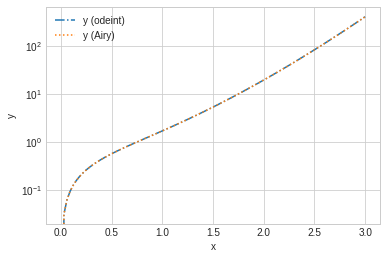

In [99]:
def model((y0,y1), x):
    y2 = (a*x+b)*y0
    return y1, y2

x = np.linspace(0, 3, 100)
ys = odeint(model, [y0,y1] ,x)
plt.plot(x, ys[:,0], '-.', label='y (odeint)')


Ai, Aip, Bi, Bip = airy(u(x))
Y = c1*Ai + c2*Bi
plt.plot(x, Y, ':', label='y (Airy)')

plt.yscale('log');
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True);
plt.legend();